# Import

In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import optuna
from sklearn.model_selection import train_test_split # for splitting the data
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
data_location = "/content/gdrive/MyDrive/First Year 2022-23/Spring 1 9-5 1 2023/NSC 325 Invester Program Energy/arXiv/data"
model_location = "/content/gdrive/MyDrive/First Year 2022-23/Spring 1 9-5 1 2023/NSC 325 Invester Program Energy/arXiv/model"

# Data

In [13]:
df = pd.read_csv(f"{data_location}/UT_Comp_Seq_encode.csv", index_col=0)

In [14]:
x = df.drop('12 month Cum Prod', axis = 1) # Features
y = df['12 month Cum Prod']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 121)

# Optuna

In [13]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.2)#0.0005, 0.05
    max_depth = trial.suggest_int("max_depth", 5, 30)# 10, 25
    n_estimators = trial.suggest_int("n_estimators", 50, 1000)# 10, 2000
    subsample = trial.suggest_float("subsample", 0.5, 1.0)#0.1, 1
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)#0.1, 1
    min_child_weight = trial.suggest_int("min_child_weight", 1, 20)
    gamma = trial.suggest_float("gamma", 0, 1)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1)

    model = xgb.XGBRegressor(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        reg_alpha=reg_alpha,
        random_state=121
    )

    # Use cross-validation to evaluate the model
    kf = KFold(n_splits=5)
    score = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    mse = -1 * np.mean(score)

    return mse

In [15]:
# Create the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best Parameters: ", best_params)

[I 2023-11-23 18:18:07,112] A new study created in memory with name: no-name-f265915f-162d-4ded-997c-199e42590ea0
[I 2023-11-23 18:18:18,853] Trial 0 finished with value: 388.6950562184228 and parameters: {'learning_rate': 0.07398155513434948, 'max_depth': 27, 'n_estimators': 66, 'subsample': 0.9923997697202926, 'colsample_bytree': 0.7759715799714213, 'min_child_weight': 7, 'gamma': 0.40913353882834247, 'reg_alpha': 0.33718075090421096}. Best is trial 0 with value: 388.6950562184228.
[I 2023-11-23 18:18:39,954] Trial 1 finished with value: 374.32925901577045 and parameters: {'learning_rate': 0.03463049737469462, 'max_depth': 15, 'n_estimators': 479, 'subsample': 0.5737147167411448, 'colsample_bytree': 0.6039650479244736, 'min_child_weight': 9, 'gamma': 0.00623893505820039, 'reg_alpha': 0.831069995565746}. Best is trial 1 with value: 374.32925901577045.
[I 2023-11-23 18:18:43,624] Trial 2 finished with value: 409.12880997766206 and parameters: {'learning_rate': 0.18870944805149653, 'max

Best Parameters:  {'learning_rate': 0.021910070286201015, 'max_depth': 9, 'n_estimators': 937, 'subsample': 0.7346478787520607, 'colsample_bytree': 0.7080566005407049, 'min_child_weight': 5, 'gamma': 0.2753472637839835, 'reg_alpha': 0.9984781954732295}


# Model

In [16]:
hyperpar = {'learning_rate': 0.021910070286201015, 'max_depth': 9, 'n_estimators': 937, 'subsample': 0.7346478787520607, 'colsample_bytree': 0.7080566005407049, 'min_child_weight': 5, 'gamma': 0.2753472637839835, 'reg_alpha': 0.9984781954732295}

In [17]:
model = xgb.XGBRegressor(**hyperpar)
model.fit(x_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(x_test)

In [19]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {:.2f}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))


Mean Squared Error: 342.47
Root Mean Squared Error: 18.51
Mean Absolute Error: 10.20
R2 Score: 0.88


# 500

In [20]:
MSE500, R2500 = list(), list()

In [21]:
for i in range(500):
  hyperpar.update({'random_state':i})
  model = xgb.XGBRegressor(**hyperpar)
  forest_fit = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # analyze
  R2 = r2_score(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  # store
  R2500.append(R2)
  MSE500.append(MSE)

In [22]:
pd.DataFrame({"MSE":MSE500, "R2":R2500}).to_csv(f"{model_location}/xgboost_500.csv")

# Read

In [7]:
XGB500 = pd.read_csv(f"{model_location}/xgboost_500.csv", index_col=0)

In [8]:
rmse500 = np.sqrt(XGB500['MSE'])
ci500 = np.percentile(rmse500, [2.5, 97.5])

In [28]:
ci500

array([18.18927566, 18.50983296])

In [9]:
rmse100 = np.sqrt(XGB500['MSE'][:100])
ci100 = np.percentile(rmse100, [2.5, 97.5])

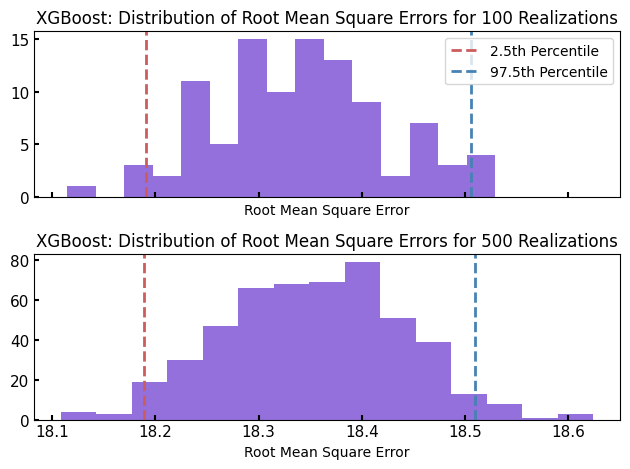

In [24]:
n_bins = 15
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

axs[0].hist(rmse100, color="mediumpurple", bins=n_bins)
axs[0].axvline(ci100[0], color='indianred', linewidth=2, linestyle = '--', label="2.5th Percentile")
axs[0].axvline(ci100[1], color='steelblue', linewidth=2, linestyle = '--', label="97.5th Percentile")

axs[0].set_xlabel('Root Mean Square Error')
axs[0].set_title('XGBoost: Distribution of Root Mean Square Errors for 100 Realizations')
axs[0].legend()
axs[0].tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')



axs[1].hist(rmse500, color="mediumpurple", bins=n_bins)
axs[1].axvline(ci500[0], color='indianred', linewidth=2, linestyle = '--', label="2.5th Percentile")
axs[1].axvline(ci500[1], color='steelblue', linewidth=2, linestyle = '--', label="97.5th Percentile")

axs[1].set_xlabel('Root Mean Square Error')
axs[1].set_title('XGBoost: Distribution of Root Mean Square Errors for 500 Realizations')
axs[1].tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')

plt.show()

# Predicted vs. Actual

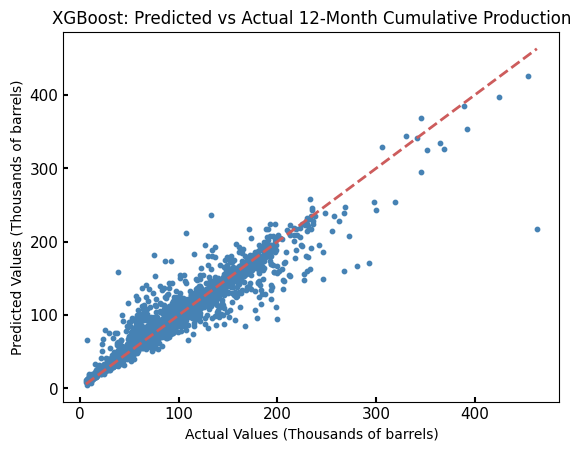

In [27]:
plt.scatter(y_test, y_pred, color='steelblue', s=10)
plt.xlabel("Actual Values (Thousands of barrels)")
plt.ylabel("Predicted Values (Thousands of barrels)")
plt.title("XGBoost: Predicted vs Actual 12-Month Cumulative Production")

# Plot the identity line (y=x) for reference
identity_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(identity_line, identity_line, color='indianred', linewidth=2, linestyle='--')
plt.tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')

plt.show()